In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

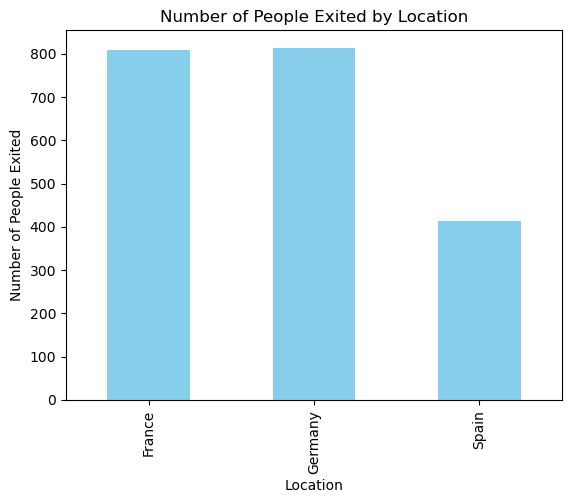

In [5]:
exited_loc_counts = df.groupby('Geography')['Exited'].sum()

exited_loc_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Location')
plt.ylabel('Number of People Exited')
plt.title('Number of People Exited by Location')
plt.show()

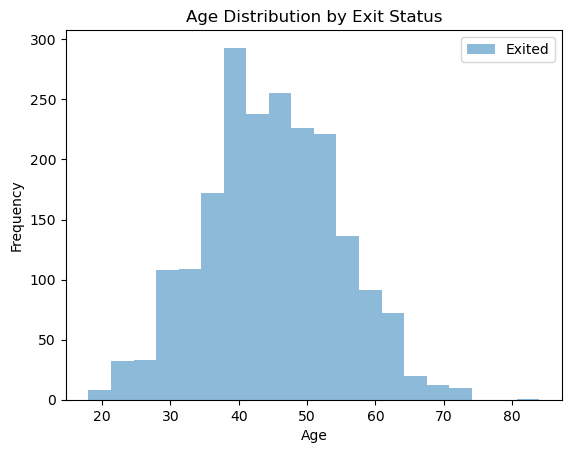

In [6]:
plt.hist([df[df['Exited'] == 1]['Age']], bins=20, alpha=0.5, label=['Exited'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Exit Status')
plt.legend()

plt.show()

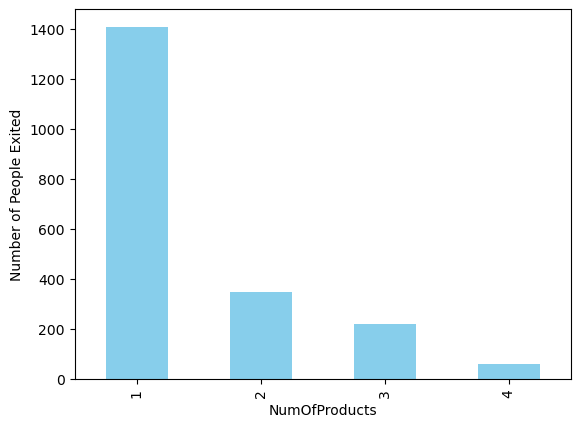

In [7]:
exited_pr_counts = df.groupby('NumOfProducts')['Exited'].sum()
exited_pr_counts.plot(kind='bar', color='skyblue')

plt.xlabel('NumOfProducts')
plt.ylabel('Number of People Exited')
plt.show()

In [8]:
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'])
(df_encoded.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [9]:
X = df_encoded.drop(['Exited','Geography_Spain'],axis = 1)
y = df_encoded['Exited']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [14]:
accuracy

0.8604

In [15]:
print(conf_matrix)

[[1913   88]
 [ 261  238]]


In [16]:
print(classification_rep)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2001
           1       0.73      0.48      0.58       499

    accuracy                           0.86      2500
   macro avg       0.81      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



In [ ]:
#accuracies:
#random_for = 0.8604
#logistic regression = 0.81
#grad_boost = 0.86